In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#Constants
G = 6.67430*10**(-11)

In [34]:
# Planet initial locations and velocities
pos_planet1 = [0,0,0]
vel_planet1 = [0,0,0]
acc_planet1 = [0,0,0]
mass_planet1 = 200
pos_planet2 = [5,10,0]
vel_planet2 = [0,0,0]
acc_planet2 = [0,0,0]
mass_planet2 = 500

In [35]:

def calc_gravF(m1,m2,pos1,pos2):
    sintern = 0
    for i in range(3):
        sintern += (pos2[i] - pos1[i])**2
    r = sintern**(1/2)
    
    return [G * m1 * m2 / (r ** 2), r]


In [36]:
# For loop to simulate frames
simulation_length = 100 # Each frame represents 1 second
information_dict = {}

der_names = ["pos","vel","acc"]
for i in range(2):
    name = "p" + str(i + 1)
    information_dict[name] = {}

    for j in range(3):
        information_dict[name][der_names[j]] = []

for frame in range(simulation_length):

    pos_planet1 = [x + y for x, y in zip(pos_planet1, vel_planet1)]
    pos_planet2 = [x + y for x, y in zip(pos_planet2, vel_planet2)]

    vel_planet1 = [x + y for x, y in zip(vel_planet1, acc_planet1)]
    vel_planet2 = [x + y for x, y in zip(vel_planet2, acc_planet2)]

    acc_planet1 = [0,0,0]
    acc_planet2 = [0,0,0]

    force_mag, dist = calc_gravF(mass_planet1, mass_planet2, pos_planet1, pos_planet2)
    force_vector = [0,0,0]

    x_dist = pos_planet2[0]-pos_planet1[0]
    y_dist = pos_planet2[1]-pos_planet1[1]
    z_dist = pos_planet2[2]-pos_planet1[2]

    dist_term = force_mag/dist
    force_vector[0] = dist_term*(x_dist)
    force_vector[1] = dist_term*(y_dist)
    force_vector[2] = dist_term*(z_dist)
    #Pointing from pos1 to pos2
    
    
    for i in range(3):
        acc_planet1[i] = force_vector[i]/mass_planet1
        acc_planet2[i] = -force_vector[i]/mass_planet2

    information_dict["p1"]["pos"].append(pos_planet1)
    information_dict["p1"]["vel"].append(vel_planet1)
    information_dict["p1"]["acc"].append(acc_planet1)
    information_dict["p2"]["pos"].append(pos_planet2)
    information_dict["p2"]["vel"].append(vel_planet2)
    information_dict["p2"]["acc"].append(acc_planet2)



In [37]:
print(information_dict["p1"]["pos"][:][0])
x_pos1 = []
for i in range(simulation_length):
    x_pos1.append(information_dict['p1']['pos'][i][0])
x_pos2 = []
for i in range(simulation_length):
    x_pos2.append(information_dict['p2']['pos'][i][0])
x_pos1 = []
for i in range(simulation_length):
    x_pos1.append(information_dict['p1']['pos'][i][0])
x_pos2 = []
for i in range(simulation_length):
    x_pos2.append(information_dict['p2']['pos'][i][0])

[0, 0, 0]


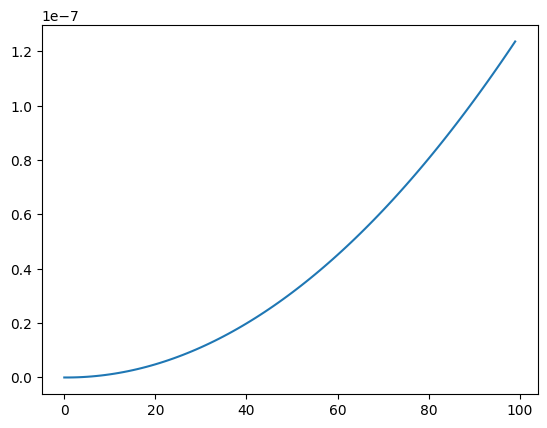

In [39]:
plt.plot(range(simulation_length), x_pos1)


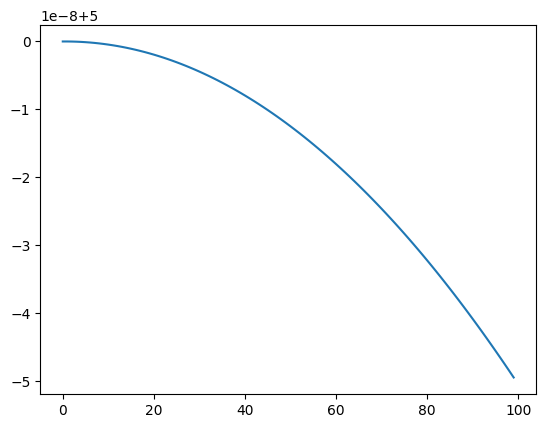

In [40]:
plt.plot(range(simulation_length), x_pos2)